
# **ETL Assignment**
- Muhammad Uzair Khan CT 051
- Muhammad Daniyal Saleem CT 063
- Faseeh Ur Rehman CT 068

### What is ETL?
In the world of data warehousing, if you need to bring data from multiple different data sources into one, centralized database, you must first:

- EXTRACT data from its original source
- TRANSFORM data by deduplicating it, combining it, and ensuring quality, to then
- LOAD data into the target database

ETL tools enable data integration strategies by allowing companies to gather data from multiple data sources and consolidate it into a single, centralized location. ETL tools also make it possible for different types of data to work together.

In [93]:
pip install pymongo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 34.0 MB/s eta 0:00:00


# **Data from Webscrapping**

## **Data Extraction**


## Importing necessary librarief for data extraction
- ### Scraping Pak Wheels

In [ ]:
import requests
from bs4 import BeautifulSoup
import regex as re

In [ ]:
# Regular Expression Patterns
pattern = r'(.*?)(?:\b\d{4}\b|$)'
model_pattern = r'^([^\d]+)'
details_pattern = r'\b\d{4}\b(.*?)$'
man_pattern = r'^(\w+)'
var_pattern = r'\b\w+\s(.*)'

In [ ]:
# Extracting Data using Beautiful soup
for i in range(2,3195):
    url ='https://www.pakwheels.com/used-cars/search/-/?page='+str(i)
    webpage = requests.get(url).text

    soup = BeautifulSoup(webpage, 'html.parser')
    cars_featured = soup.find_all('li', class_ = 'classified-listing featured-listing')

    # Extracting featured cars data
    for car in cars_featured:
        # Finding the right stuff through patterns
        title = car.find('h3').text.strip()
        model_match = re.search(model_pattern, title)
        car_name = model_match.group(1).strip() if model_match else ''
        details_match = re.search(details_pattern, title)
        details = details_match.group(1).strip() if details_match else ''
        man_match = re.search(man_pattern, title)
        manufacturer = man_match.group(1) if man_match else ''
        var_match = re.search(var_pattern, car_name)
        variant = var_match.group(1) if var_match else ''

        location = car.find('ul', class_ = 'list-unstyled search-vehicle-info fs13').text.strip()
        price = car.find('div', class_ = 'price-details generic-dark-grey').text.strip()
        data1 = car.find('ul', class_ = 'list-unstyled search-vehicle-info-2 fs13').text.strip().split()
        model = data1[0]
        distance_travelled = data1[1].replace(',','')
        fuel_type = data1[3]
        engine_capacity = data1[4]
        transmission = data1[6]
        featured = 'Yes'

        # Removing For sale
        details = details.replace('for Sale',"")

        # Storing all the data in a csv file
        with open('used_cars.csv', 'a') as f:
            f.write(f'{manufacturer},{variant},{details},{location},{model},{distance_travelled},{fuel_type},{engine_capacity},{transmission},{featured},{price}\n')

    cars_not_featured = soup.find_all('li', class_ = 'classified-listing')

    # Extracting non-featured cars data
    for car in cars_not_featured:
        # Finding the right stuff through patterns
        title = car.find('h3').text.strip()
        model_match = re.search(model_pattern, title)
        car_name = model_match.group(1).strip() if model_match else ''
        details_match = re.search(details_pattern, title)
        details = details_match.group(1).strip() if details_match else ''
        man_match = re.search(man_pattern, title)
        manufacturer = man_match.group(1) if man_match else ''
        var_match = re.search(var_pattern, car_name)
        variant = var_match.group(1) if var_match else ''

        location = car.find('ul', class_ = 'list-unstyled search-vehicle-info fs13').text.strip()
        price = car.find('div', class_ = 'price-details generic-dark-grey').text.strip()
        data1 = car.find('ul', class_ = 'list-unstyled search-vehicle-info-2 fs13').text.strip().split()
        model = data1[0]
        distance_travelled = data1[1].replace(',','')
        fuel_type = data1[3]
        engine_capacity = data1[4]
        transmission = data1[6]
        featured = 'No'

        # Removing For sale
        details = details.replace('for Sale',"")

        # Storing all the dat in a csv file
        with open('used_cars.csv', 'a') as f:
            f.write(f'{manufacturer},{variant},{details},{location},{model},{distance_travelled},{fuel_type},{engine_capacity},{transmission},{featured},{price}\n')


## **Transforming Data**

### Importing necessary libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Transforming Data

In [76]:
data = pd.read_csv('/content/final_used_cars.csv')

<ipython-input-76-6a4f4a833124>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/final_used_cars.csv')


In [77]:
data.head()

,Manufacturer,Varient,Details,Location,Model,Distance Travelled,Fuel Type,Engine Capacity,Transmission,Featured,Price in PKR
0,Honda,Civic,Oriel 1.8 i-VTEC CVT,Lahore,2020,72000,Petrol,1800,Automatic,Yes,5800000
1,Toyota,Passo,X,Karachi,2010,139000,Petrol,1000,Automatic,Yes,2100000
2,Honda,Civic,Oriel 1.8 i-VTEC CVT,Islamabad,2019,52000,Petrol,1800,Automatic,Yes,6050000
3,Honda,City,Aspire Prosmatec 1.5 i-VTEC,Karachi,2019,64000,Petrol,1500,Automatic,Yes,4125000
4,Toyota,Raize,Hybrid,Faisalabad,2022,18500,Hybrid,1200,Automatic,Yes,9000000


In [49]:
data.describe()

,Model,Distance Travelled
count,97123.000000,97123.000000
mean,2013.146443,85472.815502
std,8.738125,85298.031786
min,1944.000000,1.000000
25%,2008.000000,29000.000000
50%,2016.000000,74000.000000
75%,2020.000000,119000.000000
max,2023.000000,1000000.000000


In [78]:
data.shape

(97123, 11)

### Checking and Removing null values

In [79]:
data.isnull().sum()

Manufacturer              0
Varient                 487
Details               10728
Location                  0
Model                     0
Distance Travelled        0
Fuel Type                 0
Engine Capacity           0
Transmission              0
Featured                  0
Price in PKR              0
dtype: int64

In [80]:
data.dropna()

,Manufacturer,Varient,Details,Location,Model,Distance Travelled,Fuel Type,Engine Capacity,Transmission,Featured,Price in PKR
0,Honda,Civic,Oriel 1.8 i-VTEC CVT,Lahore,2020,72000,Petrol,1800,Automatic,Yes,5800000
1,Toyota,Passo,X,Karachi,2010,139000,Petrol,1000,Automatic,Yes,2100000
2,Honda,Civic,Oriel 1.8 i-VTEC CVT,Islamabad,2019,52000,Petrol,1800,Automatic,Yes,6050000
3,Honda,City,Aspire Prosmatec 1.5 i-VTEC,Karachi,2019,64000,Petrol,1500,Automatic,Yes,4125000
4,Toyota,Raize,Hybrid,Faisalabad,2022,18500,Hybrid,1200,Automatic,Yes,9000000
...,...,...,...,...,...,...,...,...,...,...,...
97116,Suzuki,FX,GA,Karachi,1984,13,Petrol,800.0,Manual,No,210000
97117,Honda,City,Aspire Prosmatec 1.5 i-VTEC,Faisalabad,2016,150000,Petrol,0.0,Automatic,No,4100000
97120,Suzuki,Bolan,VX Euro II,Islamabad,2017,44740,Petrol,800.0,Manual,No,1750000
97121,Toyota,Passo,+ Hana 1.0,Karachi,2010,94890,Petrol,1000.0,Automatic,No,2300000


### Getting all the cars into new table that have call instead of price

In [81]:
data_call = data[data['Price in PKR']=='Call']

Now dropping all these rows that habe call in price in pkr column

In [82]:
data_update = data[data['Price in PKR']!='Call']

### Contverting categorical features into numerical feature for Machine Learning

In [83]:
data_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94919 entries, 0 to 97122
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Manufacturer        94919 non-null  object
 1   Varient             94460 non-null  object
 2   Details             84349 non-null  object
 3   Location            94919 non-null  object
 4   Model               94919 non-null  int64 
 5   Distance Travelled  94919 non-null  int64 
 6   Fuel Type           94919 non-null  object
 7   Engine Capacity     94919 non-null  object
 8   Transmission        94919 non-null  object
 9   Featured            94919 non-null  object
 10  Price in PKR        94919 non-null  object
dtypes: int64(2), object(9)
memory usage: 8.7+ MB


In [84]:
categorical_columns = data_update.select_dtypes(include=['object']).columns.tolist()

print("Categorical columns:")
print(categorical_columns)

Categorical columns:
['Manufacturer', 'Varient', 'Details', 'Location', 'Fuel Type', 'Engine Capacity', 'Transmission', 'Featured', 'Price in PKR']


In [85]:
# Transforming  Price in PKR to floats as it is price listed as object
data_update['Price in PKR'] = data_update['Price in PKR'].astype(float)

<ipython-input-85-3c693273112a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_update['Price in PKR'] = data_update['Price in PKR'].astype(float)


#### Removing CC from the engine capacity column to tranform the column to float

In [87]:
data_update['Engine Capacity'] = data_update['Engine Capacity'].str.replace('cc', '')

<ipython-input-87-9dcd06477b32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_update['Engine Capacity'] = data_update['Engine Capacity'].str.replace('cc', '')


In [89]:
# Replacing empty strings with NaN in 'Engine Capacity' column
data_update['Engine Capacity'] = data_update['Engine Capacity'].replace('', np.nan)

# Converting 'Engine Capacity' column to float (after handling missing values)
data_update['Engine Capacity'] = data_update['Engine Capacity'].dropna().astype(float)

<ipython-input-89-9a405accd7ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_update['Engine Capacity'] = data_update['Engine Capacity'].replace('', np.nan)
<ipython-input-89-9a405accd7ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_update['Engine Capacity'] = data_update['Engine Capacity'].dropna().astype(float)


#### Transforming Categorical Feature to Numerical Feature with Label Encoder

In [91]:
#checking categorical columns again
categorical_columns = data_update.select_dtypes(include=['object']).columns.tolist()

print("Categorical columns:")
print(categorical_columns)

Categorical columns:
['Manufacturer', 'Varient', 'Details', 'Location', 'Fuel Type', 'Transmission', 'Featured']


In [92]:
label_encoder = LabelEncoder()

# Applying LabelEncoder to each categorical column
for col in categorical_columns:
    if col in data_update.columns:  # Check if the column exists in the DataFrame
        data_update[col] = label_encoder.fit_transform(data_update[col])

# Display updated DataFrame first 5 rows
data_update.head()

<ipython-input-92-d3e9feeddec8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_update[col] = label_encoder.fit_transform(data_update[col])
<ipython-input-92-d3e9feeddec8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_update[col] = label_encoder.fit_transform(data_update[col])
<ipython-input-92-d3e9feeddec8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,Manufacturer,Varient,Details,Location,Model,Distance Travelled,Fuel Type,Engine Capacity,Transmission,Featured,Price in PKR
0,29,103,819,175,2020,72000,5,1800.0,1,1,5800000.0
1,64,295,1104,140,2010,139000,5,1000.0,1,1,2100000.0
2,29,103,819,109,2019,52000,5,1800.0,1,1,6050000.0
3,29,102,343,140,2019,64000,5,1500.0,1,1,4125000.0
4,64,327,718,66,2022,18500,3,1200.0,1,1,9000000.0


In [62]:
data_update.head()

,Manufacturer,Varient,Details,Location,Model,Distance Travelled,Fuel Type,Engine Capacity,Transmission,Featured,Price in PKR
0,29,103,819,175,2020,72000,5,1800,Automatic,Yes,5800000.0
1,64,295,1104,140,2010,139000,5,1000,Automatic,Yes,2100000.0
2,29,103,819,109,2019,52000,5,1800,Automatic,Yes,6050000.0
3,29,102,343,140,2019,64000,5,1500,Automatic,Yes,4125000.0
4,64,327,718,66,2022,18500,3,1200,Automatic,Yes,9000000.0


## **Loading Data to Firebase**

In [131]:
import firebase_admin
from firebase_admin import credentials, db
from firebase_admin import firestore

### For used Cars

In [130]:
cred_obj = firebase_admin.credentials.Certificate('/content/mythic-fabric-386918-firebase-adminsdk-zalm2-0cecbe7cb7.json')
default_app = firebase_admin.initialize_app(cred_obj, {
	'databaseURL':'https://mythic-fabric-386918-default-rtdb.firebaseio.com/'
	})

In [142]:
# Removing null values if any
data_call = data_call.dropna()

In [143]:
# Convert DataFrame to dictionary format
data_update_dict = data_update.to_dict(orient='records')
data_call_dict = data_call.to_dict(orient='records')

In [134]:
# Access the Realtime Database
root = db.reference()

In [139]:
for index, record in enumerate(data_update_dict):
    root.child('Used_Cars_ML').child(str(index)).set(record)  # Replace with your table name

print("Data uploaded to Realtime Database successfully!")

Data uploaded to Realtime Database successfully!


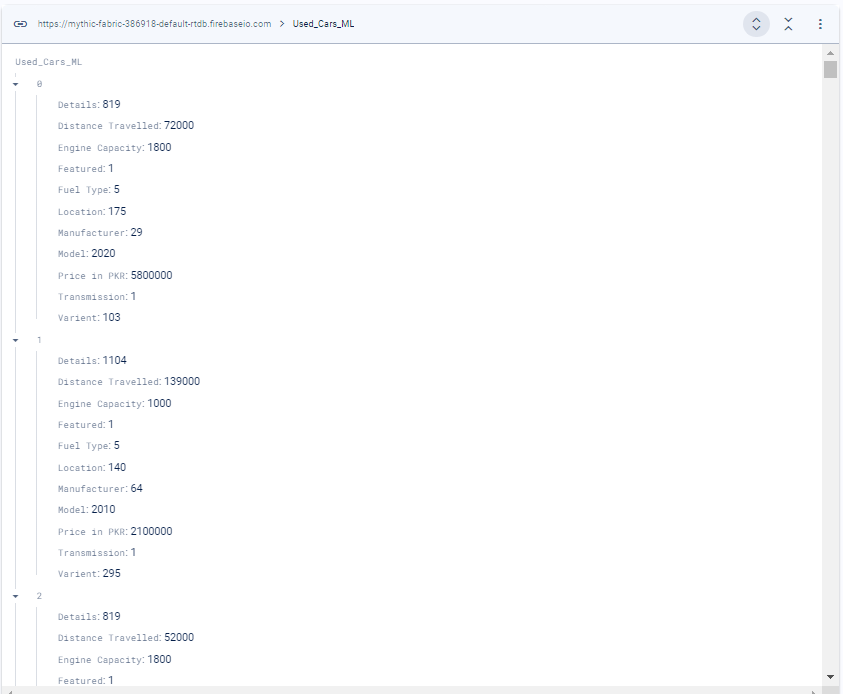

In [144]:
for index, record in enumerate(data_call_dict):
    root.child('Used_Cars_Without_Price').child(str(index)).set(record)  # Replace with your table name

print("Data uploaded to Realtime Database successfully!")

Data uploaded to Realtime Database successfully!


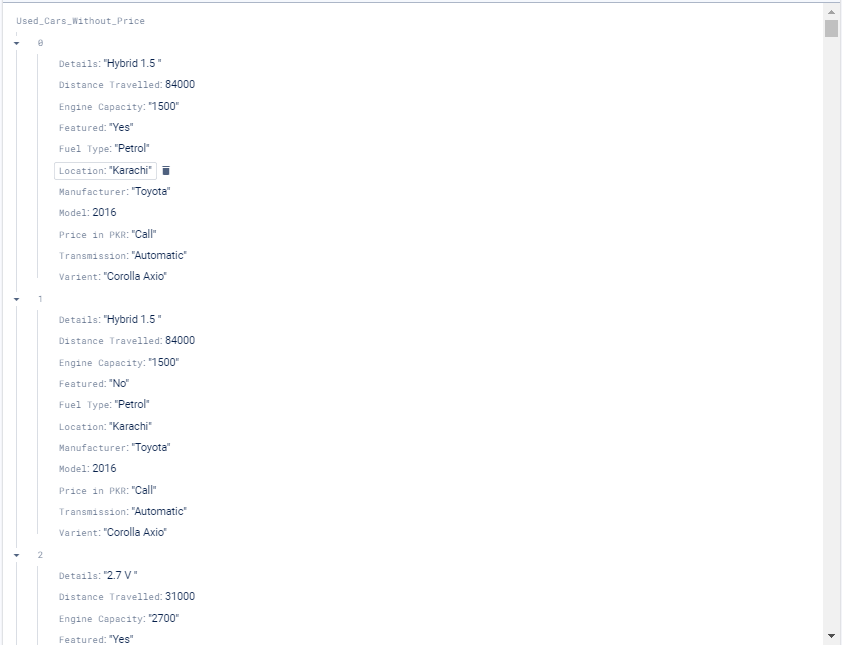

# **Data from API**

## **Data Extraction**

In [152]:
import requests
import json

url = "https://covid-193.p.rapidapi.com/statistics"

headers = {
	"X-RapidAPI-Key": "e2e421ff19msh229396aab283c64p1c1fddjsnab72d2c065ba",
	"X-RapidAPI-Host": "covid-193.p.rapidapi.com"
}

covid = requests.get(url, headers=headers).json()

print(covid)

{'get': 'statistics', 'parameters': [], 'errors': [], 'results': 238, 'response': [{'continent': 'Africa', 'country': 'Saint-Helena', 'population': 6115, 'cases': {'new': None, 'active': 2164, 'critical': None, 'recovered': 2, '1M_pop': '354211', 'total': 2166}, 'deaths': {'new': None, '1M_pop': None, 'total': None}, 'tests': {'1M_pop': None, 'total': None}, 'day': '2023-12-12', 'time': '2023-12-12T21:30:12+00:00'}, {'continent': 'South-America', 'country': 'Falkland-Islands', 'population': 3539, 'cases': {'new': None, 'active': 0, 'critical': None, 'recovered': 1930, '1M_pop': '545352', 'total': 1930}, 'deaths': {'new': None, '1M_pop': None, 'total': None}, 'tests': {'1M_pop': '2439107', 'total': 8632}, 'day': '2023-12-12', 'time': '2023-12-12T21:30:12+00:00'}, {'continent': 'North-America', 'country': 'Montserrat', 'population': 4965, 'cases': {'new': None, 'active': 19, 'critical': None, 'recovered': 1376, '1M_pop': '282578', 'total': 1403}, 'deaths': {'new': None, '1M_pop': '1611',

## **Transfromation of Data**

In [154]:
# Extracting specific fields from the JSON response
data = []

for entry in covid['response']:
    country = entry['country']
    population = entry['population']
    recovered = entry['cases']['recovered']
    total_tests = entry['tests']['total'] if 'tests' in entry else None

    # Appending extracted data as a dictionary to the 'data' list
    data.append({
        'Country': country,
        'Population': population,
        'Recovered': recovered,
        'TotalTests': total_tests
    })

# Create a DataFrame from the extracted data
covid_data = pd.DataFrame(data)

print(covid_data)

              Country   Population    Recovered   TotalTests
0        Saint-Helena       6115.0          2.0          NaN
1    Falkland-Islands       3539.0       1930.0       8632.0
2          Montserrat       4965.0       1376.0      17762.0
3    Diamond-Princess          NaN        699.0          NaN
4        Vatican-City        799.0         29.0          NaN
..                ...          ...          ...          ...
233            Poland   37739785.0          NaN   39010197.0
234              Asia          NaN  205136011.0          NaN
235            Europe          NaN  245673574.0          NaN
236               All          NaN  669276176.0          NaN
237            Russia  145805947.0   22865282.0  273400000.0

[238 rows x 4 columns]


In [150]:
covid_data.head()

,0
0,"b'{""get"":""statistics"",""parameters"":[],""errors""..."
1,"b'tion"":6115,""cases"":{""new"":null,""active"":2164..."
2,"b'""1M_pop"":null,""total"":null},""tests"":{""1M_pop..."
3,"b'ent"":""South-America"",""country"":""Falkland-Isl..."
4,"b'930,""1M_pop"":""545352"",""total"":1930},""deaths""..."


## **Loading Data to Firebase**

In [157]:
#Handling Missing Values
covid_data = covid_data.dropna()

# Convert DataFrame to dictionary format
covid_data_dict = covid_data.to_dict(orient='records')

In [158]:
for index, record in enumerate(covid_data_dict):
    root.child('Covid_Data').child(str(index)).set(record)  # Replace with your table name

print("Data uploaded to Realtime Database successfully!")

Data uploaded to Realtime Database successfully!


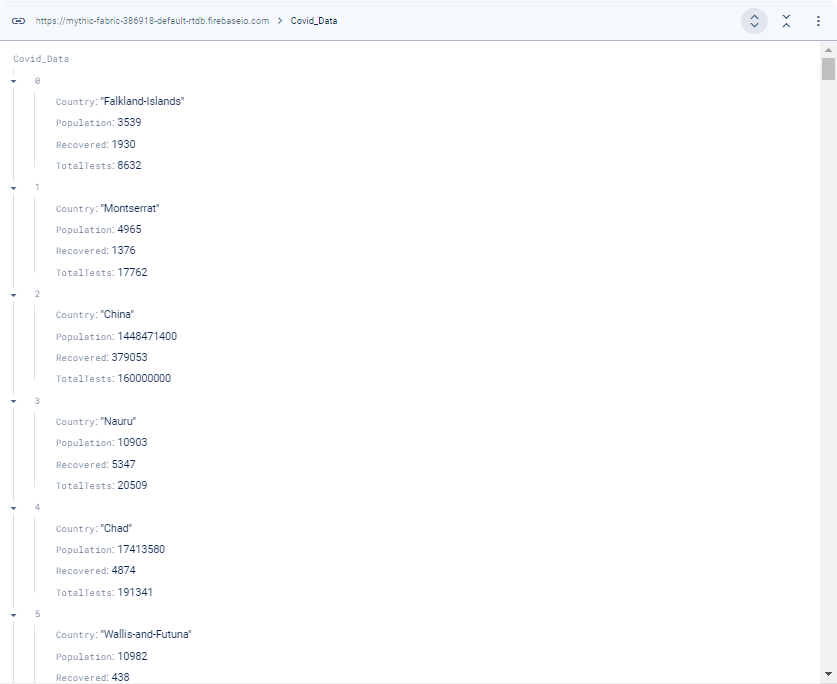

# **Data From CSV**

## **Extracting Data**

In [164]:
df = pd.read_csv("/content/movies_metadata.csv", error_bad_lines=False)

<ipython-input-164-b28a86c05328>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/content/movies_metadata.csv", error_bad_lines=False)
<ipython-input-164-b28a86c05328>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/movies_metadata.csv", error_bad_lines=False)


## **Transforming Data**

In [165]:
df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


### Dropping Columns

In [166]:
drop_df = ["homepage", "poster_path", "video", "imdb_id", "overview", "original_title",
           "spoken_languages", "tagline"]
df = df.drop(drop_df, axis=1) # drops the selected columns
df = df.drop_duplicates(keep='first') # removes the duplicates from existing dataframe
df.dropna(how="all",inplace=True) # if each column is NaN or null in a row, drops this row

<ipython-input-166-68bc4765aa9b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(how="all",inplace=True) # if each column is NaN or null in a row, drops this row


In [167]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45453 entries, 0 to 45465
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45453 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45453 non-null  object 
 3   genres                 45453 non-null  object 
 4   id                     45453 non-null  object 
 5   original_language      45442 non-null  object 
 6   popularity             45448 non-null  object 
 7   production_companies   45450 non-null  object 
 8   production_countries   45450 non-null  object 
 9   release_date           45366 non-null  object 
 10  revenue                45447 non-null  float64
 11  runtime                45190 non-null  float64
 12  status                 45366 non-null  object 
 13  title                  45447 non-null  object 
 14  vote_average           45447 non-null  float64
 15  vo

### Changing Data Type

In [168]:
df.dropna(subset=["title"], inplace=True)
df["id"] =pd.to_numeric(df['id'], errors='coerce', downcast="integer")
df["popularity"] =pd.to_numeric(df['popularity'], errors='coerce', downcast="float")
df["budget"] =pd.to_numeric(df['budget'], errors='coerce', downcast="float")
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

### Handlinig Missing Values

In [169]:
df['belongs_to_collection'] = df['belongs_to_collection'].fillna("None")
df['belongs_to_collection'] = (df['belongs_to_collection'] != "None").astype(int)

In [170]:
df["adult"].value_counts()

False    45438
True         9
Name: adult, dtype: int64

In [171]:
df.drop(["adult"], inplace=True, axis=1)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45352 entries, 0 to 45465
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  45352 non-null  int64         
 1   budget                 45352 non-null  float64       
 2   genres                 45352 non-null  object        
 3   id                     45352 non-null  int32         
 4   original_language      45352 non-null  object        
 5   popularity             45352 non-null  float32       
 6   production_companies   45352 non-null  object        
 7   production_countries   45352 non-null  object        
 8   release_date           45352 non-null  datetime64[ns]
 9   revenue                45352 non-null  float64       
 10  runtime                45352 non-null  float64       
 11  status                 45352 non-null  object        
 12  title                  45352 non-null  object        
 13  v

In [173]:
df["status"].fillna(df["status"].value_counts().idxmax(), inplace=True)
df["runtime"] = df["runtime"].replace(0, np.nan)
df["runtime"].fillna(df["runtime"].mean(), inplace=True)

In [174]:
df.dropna(subset=["release_date"],inplace=True)
df.dropna(subset=["original_language"],inplace=True)

In [176]:
df.shape

(45352, 16)

## **Load Data to Firebase**

In [190]:
# Convert DataFrame to dictionary format
movies_data_dict = df.to_dict(orient='records')

In [192]:
for index, record in enumerate(movies_data_dict):
    # Convert Timestamp object to string in the dictionary
    root.child('Movies_Data').child(str(index)).set(record)

print("Data uploaded to Realtime Database successfully!")

Data uploaded to Realtime Database successfully!


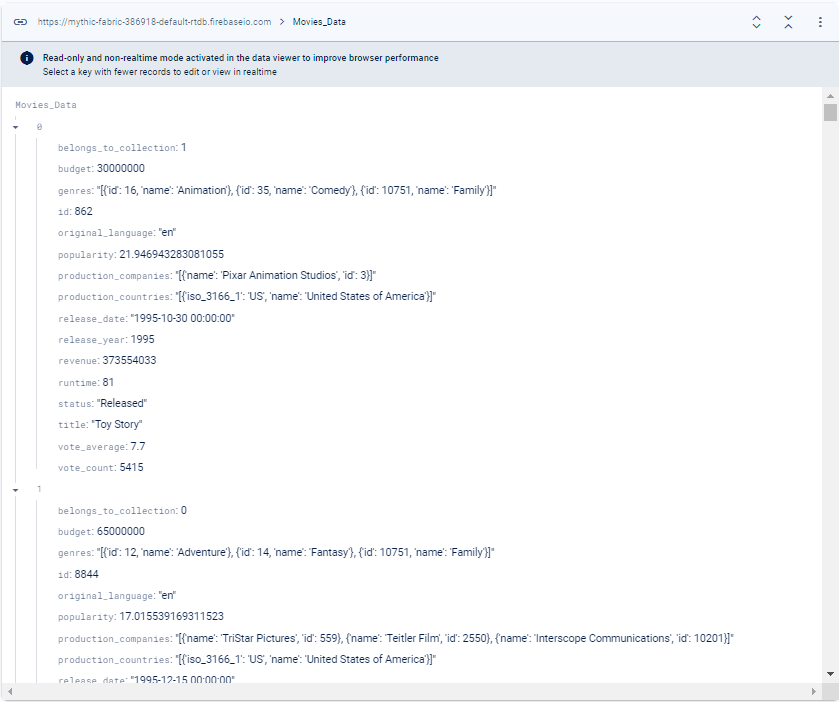